In [392]:
# Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tabula as tb
import scipy
plt.rcParams['figure.figsize']=(10,5)

In [393]:
# Считываем все таблицы из задания с помощью библиотеки tabula
pdf_red_array = tb.read_pdf("tasks/Практика 28 сентября 2021.pdf", pages="all") 

Got stderr: Nov 23, 2021 5:28:59 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:28:59 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:00 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:00 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:00 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:01 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:01 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>
Nov 23, 2021 5:29:01 AM org.apache.pdfbox.pdmodel.font.PDTrueTypeFont <init>



In [394]:
# Проверяем количество получившихся таблиц
# (их вышло больше, посколку некоторые таблицы были разделены по страницам)
len(pdf_red_array)

12

In [395]:
# В результате считывания получаем список из датафреймов, каждый помещаем в переменную
task_0_df = pdf_red_array[0]
task_1_df = pdf_red_array[1]
task_2_df = pdf_red_array[2]
task_3_df = pdf_red_array[3]
task_4_df = pdf_red_array[4]
task_5_df = pdf_red_array[5]
task_6_df = pdf_red_array[6]
task_7_df = pdf_red_array[7]
task_8_df = pdf_red_array[8]
task_9_df = pdf_red_array[9]
task_10_df = pdf_red_array[10]
task_11_df = pdf_red_array[11]

In [396]:
# ЗАДАНИЕ_1
"""Известно, что при существенных различиях в уровне подготовки студентов,
обучающая методика будет неэффективна. Условие соблюдения
однородности подготовки при разбросе в набранных на входном тестировании
баллах не должно превышать 4500 (дисперсия). Студенты при тестировании
показали следующие результаты: 240, 256, 334, 176, 254, 219, 277, 414, 215,
366 баллов. Докажите, что условие однородности не соблюдается. Будет ли
группа однородна по уровню подготовки, если перевести в другую группу
самого успевающего студента?"""

'Известно, что при существенных различиях в уровне подготовки студентов,\nобучающая методика будет неэффективна. Условие соблюдения\nоднородности подготовки при разбросе в набранных на входном тестировании\nбаллах не должно превышать 4500 (дисперсия). Студенты при тестировании\nпоказали следующие результаты: 240, 256, 334, 176, 254, 219, 277, 414, 215,\n366 баллов. Докажите, что условие однородности не соблюдается. Будет ли\nгруппа однородна по уровню подготовки, если перевести в другую группу\nсамого успевающего студента?'

In [397]:
students_results = np.array([240, 256, 334, 176, 254, 219, 277, 414, 215, 366])

In [398]:
# В случае если студент остается в группе дисперсия превышает заданный порог
students_results.var() 

4965.09

In [399]:
# Если сильный студент переходит в другую группу, то дисперсия не превышает заданный порог
np.delete(students_results ,np.where(students_results == students_results.max())).var()

3134.8888888888887

In [400]:
# ЗАДАНИЕ_2
"""На основании данных тестирования по 10 дисциплинам рассчитать
коэффициент разности степени подготовки студентов – децильный
коэффициент (отношение девятого дециля к первому):"""

'На основании данных тестирования по 10 дисциплинам рассчитать\nкоэффициент разности степени подготовки студентов – децильный\nкоэффициент (отношение девятого дециля к первому):'

In [401]:
task_0_df

,Баллы,<100,101-300,301-500,501-700,701-900,901-1000
0,кол-во,160.0,174.0,40.0,20.0,4.0,2.0
1,чел,NaN,NaN,NaN,NaN,NaN,NaN


In [402]:
# Убираем лишнюю строчку
task_0_df = task_0_df.drop(1, axis=0)

In [403]:
# Перевернем таблицу для удобного счета и сразу отсортируем 
task_0_df = task_0_df.melt(id_vars="Баллы").rename({"value": "scores"}, axis=1)
task_0_df = task_0_df.sort_values(by="scores")

In [404]:
# Дабавим отдельную колонку с децильным значениями
task_0_df["decil_rank"] = pd.qcut(task_0_df["scores"], q=10, labels=False)

In [405]:
task_0_df["rercents"] = task_0_df["scores"]/task_0_df["scores"].sum()*100

In [406]:
all_students = task_0_df["scores"].sum()

In [407]:
# Посчитаем результат
task_0_df.loc[task_0_df["decil_rank"]==9]["scores"].values[0]\
    /task_0_df.loc[task_0_df["decil_rank"]==0]["scores"].values[0]

87.0

In [408]:
# ЗАДАНИЕ_3
"""Для выяснения вопроса растет ли компетенция учителя с его стажем оцените
силу линейной связи между стажем педагогов и их компетенцией, оцененной
по определённой методике"""

'Для выяснения вопроса растет ли компетенция учителя с его стажем оцените\nсилу линейной связи между стажем педагогов и их компетенцией, оцененной\nпо определённой методике'

In [409]:
task_1_df

,Номер,Стаж,Компетенция
0,1,16,26
1,2,22,15
2,3,25,22
3,4,40,30
4,5,22,16
5,6,16,30


No handles with labels found to put in legend.


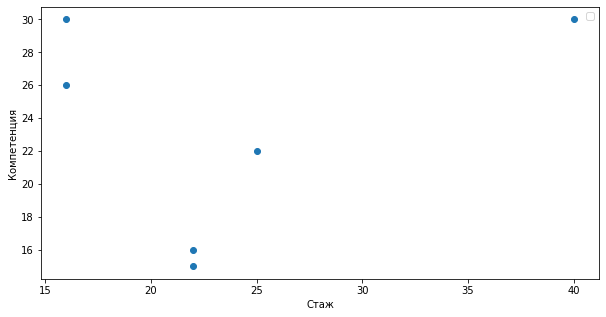

In [410]:
# Визуально оценми предположительную связь
plt.scatter(x=task_1_df["Стаж"], y=task_1_df["Компетенция"])
plt.xlabel("Стаж")
plt.ylabel("Компетенция")
plt.legend()
plt.show()

In [411]:
# Получим связь
np.corrcoef(task_1_df["Стаж"], task_1_df["Компетенция"])[0, 1]

0.2091591742720674

In [412]:
# ЗАДАНИЕ_4
"""При проверке работы учителей составили таблицу, отражающую связь опыта
работы по новой методике и количества зафиксированных отклонений от
предложенной методики:
Рассчитайте силу линейной связи между имеющимися данными, сделайте
выводы."""

'При проверке работы учителей составили таблицу, отражающую связь опыта\nработы по новой методике и количества зафиксированных отклонений от\nпредложенной методики:\nРассчитайте силу линейной связи между имеющимися данными, сделайте\nвыводы.'

In [413]:
# Добавим пропущенную строку
task_2_df = task_2_df.append(\
    pd.DataFrame({"Количество":[2], "Unnamed: 0":[24], "Опыт работы":[12], "Unnamed: 1":[3]}))

In [414]:
# Изменим названия колонок для удобства
task_2_df.columns = task_2_df.iloc[0].values

In [415]:
task_2_df = task_2_df.reset_index().drop(0, axis=0).drop("index", axis=1)

In [416]:
# Преобразуем строки в числа
task_2_df = task_2_df.applymap(int)

In [417]:
task_2_df

,нарушений,< 6 месяцев,6 – 12 месяцев,> 12 месяцев
1,0,8,16,27
2,1,13,19,16
3,2,24,12,3


In [418]:
np.corrcoef(task_2_df["нарушений"],task_2_df["< 6 месяцев"])[0, 1]

0.9773555548504418

In [419]:
np.corrcoef(task_2_df["нарушений"],task_2_df["6 – 12 месяцев"])[0, 1]

-0.5694947974514993

In [420]:
np.corrcoef(task_2_df["нарушений"],task_2_df["> 12 месяцев"])[0, 1]

-0.9988445981121533

In [421]:
# Между количетсвом ошибок и стажем работы имеется сильная связь, причем чем больше стаж, тем меньше 
# ошибок 

In [422]:
# ЗАДАНИЕ_5
"""Для оценки образовательной активности педагогов ввели коэффициент
активности педагогов по повышению квалификации. Данные по двум
образовательным организациям и активности повышения квалификации
педагогов представлены в таблицах:
Сравните связь между возрастом и коэффициентов активности педагогов по
повышению квалификации в этих образовательных организациях с помощью
показателя ковариации, Коэффициент корреляции, рассчитанный по данным
двух образовательных организаций, составляет 0,31 и указывает на наличие
связи между признаками. можно ли распространить этот вывод на обе
организации?"""

'Для оценки образовательной активности педагогов ввели коэффициент\nактивности педагогов по повышению квалификации. Данные по двум\nобразовательным организациям и активности повышения квалификации\nпедагогов представлены в таблицах:\nСравните связь между возрастом и коэффициентов активности педагогов по\nповышению квалификации в этих образовательных организациях с помощью\nпоказателя ковариации, Коэффициент корреляции, рассчитанный по данным\nдвух образовательных организаций, составляет 0,31 и указывает на наличие\nсвязи между признаками. можно ли распространить этот вывод на обе\nорганизации?'

In [423]:
# Преобразуем таблицу в более удобный формат
first_org = task_4_df.drop(0, axis=0).melt().drop([0,1], axis=0)
second_org = task_5_df.drop(0, axis=0).melt().drop([0,1], axis=0)

In [424]:
first_org

,variable,value
2,1,23.0
3,1,0.0
4,2,36.0
5,2,30.0
6,3,18.0
7,3,100.0
8,4,24.0
9,4,31.0
10,5,56.0
11,5,36.0


In [425]:
# Визуально оценим данные для первой организации
plt.scatter(x=first_org.loc[first_org["номер по"]=="возраст"].drop,\
    y=first_org.loc[first_org["номер по"]=="коэф.пов.кв."])

KeyError: 'номер по'